# Download Dataset

In [1]:
! wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/rscbjbr9sj-2.zip

--2022-04-05 12:58:08--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/rscbjbr9sj-2.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.117.234
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.117.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7030149142 (6.5G) [application/octet-stream]
Saving to: ‘rscbjbr9sj-2.zip’

rscbjbr9sj-2.zip    100%[===================>]   6.55G  27.1MB/s    in 4m 8s   

2022-04-05 13:02:16 (27.1 MB/s) - ‘rscbjbr9sj-2.zip’ saved [7030149142/7030149142]



In [2]:
! unzip rscbjbr9sj-2.zip
! unzip ChestXRay2017.zip
! tar –xvzf OCT2017.tar.gz
! rm -rf *.zip
! rm -rf *.tar.gz
! rm -rf chest_xray/train/NORMAL/.DS_Store
! rm -rf chest_xray/train/PNEUMONIA/.DS_Store
! rm -rf chest_xray/test/NORMAL/.DS_Store
! rm -rf chest_xray/test/PNEUMONIA/.DS_Store

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/PNEUMONIA/person902_bacteria_2827.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person825_bacteria_2736.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1733_bacteria_4566.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person28_bacteria_141.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person494_bacteria_2090.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1088_virus_1800.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person62_bacteria_300.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1328_virus_2295.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1109_bacteria_3050.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person554_bacteria_2320.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person573_bacteria_2369.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1597_bacteria_4192.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1422_virus_2434.jpeg  
  inflating: chest_xray/train/PNE

# Data Exploration

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import random
import cv2
%matplotlib inline

sns.set_style("whitegrid")
random.seed(30)

In [4]:
! ls chest_xray/train/NORMAL | wc -l
! ls chest_xray/train/PNEUMONIA | wc -l

1349
3883


In [5]:
! ls chest_xray/test/NORMAL | wc -l
! ls chest_xray/test/PNEUMONIA | wc -l

234
390


In [6]:
normal = []
for choice in random.choices(os.listdir("chest_xray/train/NORMAL"), k=5):
  img = mpimg.imread(f"chest_xray/train/NORMAL/{choice}")
  normal.append(img)

In [7]:
pneumonia = []
for choice in random.choices(os.listdir("chest_xray/train/PNEUMONIA"), k=5):
  img = mpimg.imread(f"chest_xray/train/PNEUMONIA/{choice}")
  pneumonia.append(img)

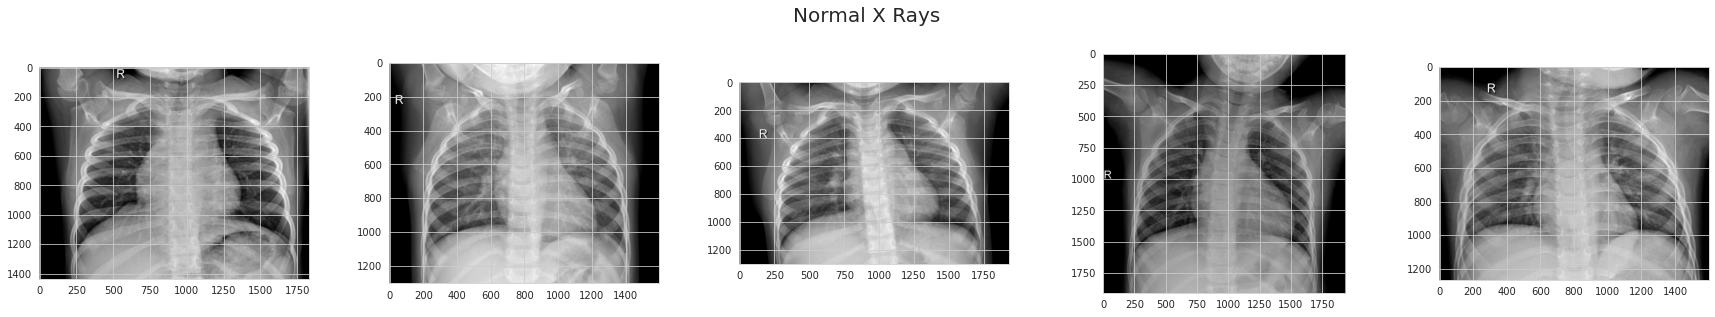

In [8]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(25,5))
plt.tight_layout(pad=5.0)
title = 'Normal X Rays'
fig.suptitle(title, fontsize=20)

ax[0].imshow(normal[0], cmap="gray")
ax[1].imshow(normal[1], cmap="gray")
ax[2].imshow(normal[2], cmap="gray")
ax[3].imshow(normal[3], cmap="gray")
ax[4].imshow(normal[4], cmap="gray")


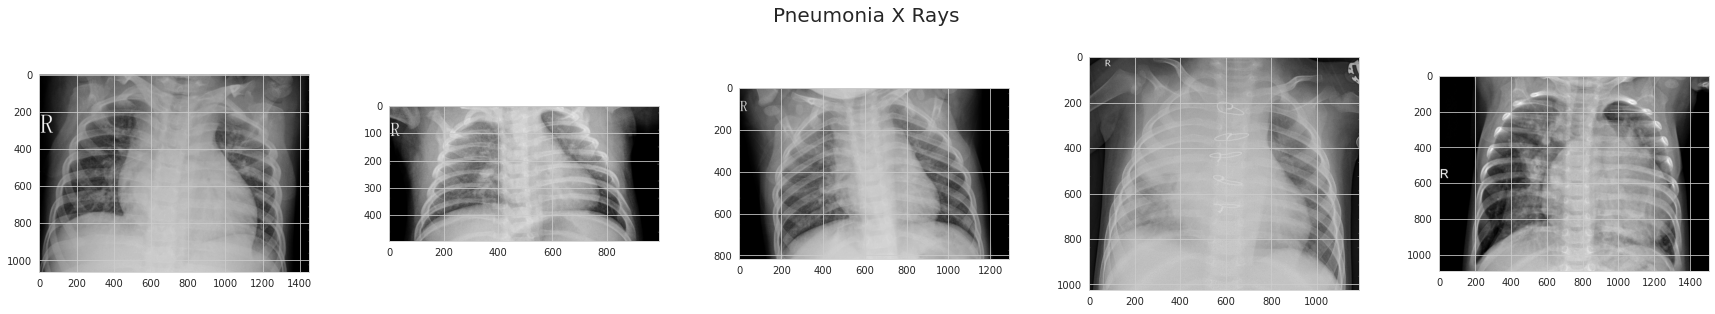

In [9]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(25,5))
plt.tight_layout(pad=5.0)
title = 'Pneumonia X Rays'
fig.suptitle(title, fontsize=20)

ax[0].imshow(pneumonia[0], cmap="gray")
ax[1].imshow(pneumonia[1], cmap="gray")
ax[2].imshow(pneumonia[2], cmap="gray")
ax[3].imshow(pneumonia[3], cmap="gray")
ax[4].imshow(pneumonia[4], cmap="gray")


# Creating Validation Set and Data Augmentation

The training set is divided in two parts:


1.   Training Part (90%)
2.   Validation (10%)

Data augmentation is done on both training and test sets

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
! mkdir chest_xray/val
! mkdir chest_xray/val/NORMAL
! mkdir chest_xray/val/PNEUMONIA

In [12]:
random.seed(2020)
for choice in random.choices(os.listdir("chest_xray/train/NORMAL"), k=135):
  src = f"chest_xray/train/NORMAL/{choice}"
  dest = f"chest_xray/val/NORMAL/{choice}"
  try:
    os.rename(src, dest)
  except:
    print(choice)

NORMAL2-IM-1180-0001.jpeg
NORMAL2-IM-0395-0001-0002.jpeg
IM-0357-0001.jpeg


In [13]:
random.seed(2020)
for choice in random.choices(os.listdir("chest_xray/train/PNEUMONIA"), k=388):
  src = f"chest_xray/train/PNEUMONIA/{choice}"
  dest = f"chest_xray/val/PNEUMONIA/{choice}"
  try:
    os.rename(src, dest)
  except:
    print(choice)

person1663_bacteria_4412.jpeg
person506_virus_1018.jpeg
person319_bacteria_1480.jpeg
person74_bacteria_363.jpeg
person583_bacteria_2406.jpeg
person1351_virus_2330.jpeg
person1636_bacteria_4337.jpeg
person863_bacteria_2785.jpeg
person604_bacteria_2463.jpeg
person645_bacteria_2537.jpeg
person393_bacteria_1789.jpeg
person547_bacteria_2294.jpeg
person76_bacteria_370.jpeg
person778_bacteria_2682.jpeg
person1617_bacteria_4254.jpeg


In [14]:
datagen = ImageDataGenerator(rescale=1/255,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2, 
                           horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
image_height = 200
image_width = 200
batch_size = 10
no_of_epochs  = 100

In [16]:
train_set = datagen.flow_from_directory('chest_xray/train',target_size=(image_width, image_height),batch_size=batch_size,class_mode='binary')
val_set = datagen.flow_from_directory('chest_xray/val',target_size=(image_width, image_height),batch_size=batch_size,class_mode='binary')
test_set = test_datagen.flow_from_directory('chest_xray/test',target_size=(image_width, image_height),batch_size=batch_size,class_mode='binary')

Found 4727 images belonging to 2 classes.
Found 505 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Creating the Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

In [18]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.build(input_shape=(None, 200, 200, 3))

In [19]:
opt = SGD(learning_rate=0.01)
#opt = SGD()
model.compile(loss='binary_crossentropy',
              optimizer=opt, metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [21]:
reduce_learning_rate = ReduceLROnPlateau(monitor='accuracy',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.000001,
                                         verbose=1)

callbacks = [reduce_learning_rate]

In [22]:
model.fit(train_set,
          validation_data=val_set,
          epochs=50, batch_size=10, callbacks=callbacks)

Epoch 1/50
473/473 [==============================] - 119s 228ms/step - loss: 0.5832 - accuracy: 0.7415 - val_loss: 0.5804 - val_accuracy: 0.7386 - lr: 0.0100
Epoch 2/50
473/473 [==============================] - 109s 231ms/step - loss: 0.5731 - accuracy: 0.7425 - val_loss: 0.5671 - val_accuracy: 0.7386 - lr: 0.0100
Epoch 3/50
473/473 [==============================] - 109s 231ms/step - loss: 0.5654 - accuracy: 0.7428 - val_loss: 0.5566 - val_accuracy: 0.7386 - lr: 0.0100
Epoch 4/50
473/473 [==============================] - 111s 234ms/step - loss: 0.5564 - accuracy: 0.7415 - val_loss: 0.5491 - val_accuracy: 0.7386 - lr: 0.0100
Epoch 5/50
473/473 [==============================] - 111s 235ms/step - loss: 0.5178 - accuracy: 0.7502 - val_loss: 0.5060 - val_accuracy: 0.7406 - lr: 0.0100
Epoch 6/50
473/473 [==============================] - 108s 229ms/step - loss: 0.4476 - accuracy: 0.7853 - val_loss: 0.3629 - val_accuracy: 0.8317 - lr: 0.0100
Epoch 7/50
473/473 [==========================

In [23]:
model.save('stephen.h5')
model.save('stephen')

INFO:tensorflow:Assets written to: stephen/assets


# Model Evaluation

In [24]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import numpy as np

In [25]:
print("Training Set:")
train_acc = model.evaluate(train_set)

print("Test Set:")
test_acc = model.evaluate(test_set)

Training Set:
473/473 [==============================] - 92s 194ms/step - loss: 0.1803 - accuracy: 0.9270
Test Set:
63/63 [==============================] - 7s 112ms/step - loss: 0.3657 - accuracy: 0.8622


## Training Set Confusion Matrix

In [43]:
train_orig = []
for i in range(4727//10 + 1):
    for label in train_set[i][1]:
        train_orig.append(label)
        
train_orig = np.array(train_orig)

In [44]:
train_pred = model.predict(train_set)
train_pred = np.around(train_pred)

<Figure size 432x288 with 0 Axes>

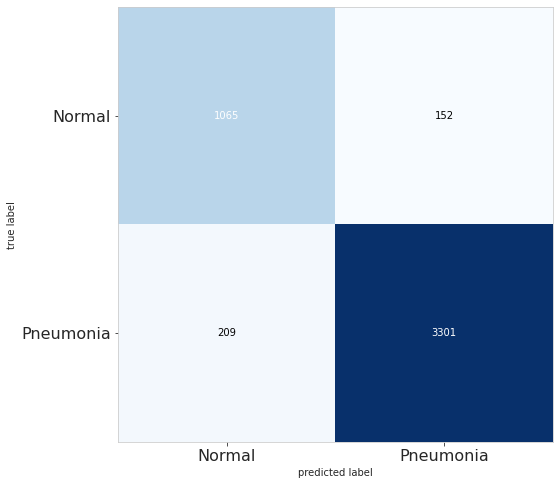

In [45]:
cm  = confusion_matrix(train_orig, train_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [46]:
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)

print("Sensitivity (Recall): {:.4f}".format(recall))
print("Specificity: {:.4f}".format(specificity))
print("Precision: {:.4f}".format(precision))

Sensitivity (Recall): 0.9405
Specificity: 0.8751
Precision: 0.9560


In [47]:
tn

1065

## Test Set Confusion Matrix

In [48]:
test_orig = []
for i in range(624//10 + 1):
    for label in test_set[i][1]:
        test_orig.append(label)
        
test_orig = np.array(test_orig)

In [49]:
test_pred = model.predict(test_set)
test_pred = np.around(test_pred)

<Figure size 432x288 with 0 Axes>

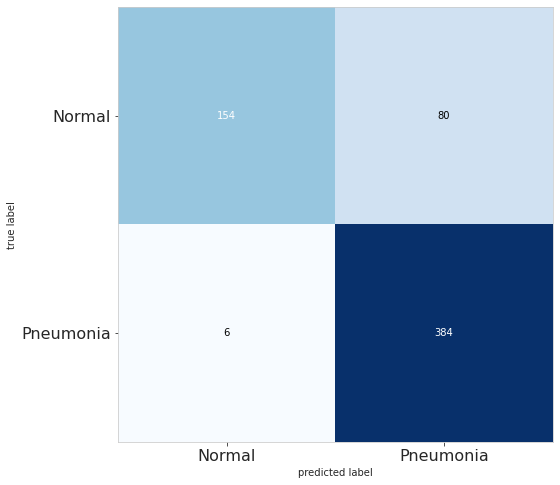

In [50]:
cm  = confusion_matrix(test_orig, test_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [51]:
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity=tn/(tn+fp)

print("Sensitivity (Recall): {:.4f}".format(recall))
print("Specificity: {:.4f}".format(specificity))
print("Precision: {:.4f}".format(precision))

Sensitivity (Recall): 0.9846
Specificity: 0.6581
Precision: 0.8276


In [37]:
tn

154

In [34]:
! tar -cvzf stephen.tar.gz stephen

stephen/
stephen/keras_metadata.pb
stephen/assets/
stephen/variables/
stephen/variables/variables.index
stephen/variables/variables.data-00000-of-00001
stephen/saved_model.pb
